# Pre-owned cars: A case study

   ##### -Srivathsan G

### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import math
import matplotlib
import seaborn as sns

%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_csv('cars_sample.csv', sep=',', header=0, encoding='cp1252')
df.sample(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
17393,06/03/2016 0:25,BMW_318i,private,offer,2500,control,limousine,1999,manual,118,3er,150000,12,petrol,bmw,no,05/03/2016 0:00,60529,06/04/2016 4:45
40682,26/03/2016 21:52,Volkswagen_Eos_2.0_FSI_Samoarot_perl._Vollleder,private,offer,8500,control,cabrio,2006,manual,150,eos,125000,6,petrol,volkswagen,no,26/03/2016 0:00,90427,06/04/2016 13:16
15836,15/03/2016 22:49,Hole_ihr_Auto_wenn_es_defekt_ist,private,offer,10,control,NaN,1995,NaN,45,NaN,150000,5,NaN,audi,NaN,15/03/2016 0:00,92348,15/03/2016 23:41
36963,01/04/2016 0:53,Mercedes_Benz_C_200_CDI_Classic_Gruene_Plakette,private,offer,2990,test,limousine,2002,manual,116,c_klasse,150000,4,diesel,mercedes_benz,no,31/03/2016 0:00,44263,01/04/2016 7:44
32771,27/03/2016 15:55,VW_Passat_highline_1_4l_Kombi_Eco_Fuel,private,offer,7200,control,NaN,2016,manual,150,NaN,150000,6,NaN,volkswagen,no,27/03/2016 0:00,86420,30/03/2016 21:15


In [3]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000000e+04,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,5.325941e+04,2004.494060,115.64740,125588.700000,5.741740,50911.446000
std,9.620356e+06,81.446313,177.38175,40217.039679,3.710105,25845.348279
min,0.000000e+00,1000.000000,0.00000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,70.00000,125000.000000,3.000000,30519.000000
50%,2.950000e+03,2003.000000,105.00000,150000.000000,6.000000,49632.000000
75%,7.300000e+03,2008.000000,150.00000,150000.000000,9.000000,71686.000000
max,2.147484e+09,9999.000000,16312.00000,150000.000000,12.000000,99998.000000


### Analyzing the categorical features

In [4]:
print(df['seller'].value_counts())
print(df['offerType'].value_counts())
print(df['abtest'].value_counts())
print(df['vehicleType'].value_counts())
print(df['gearbox'].value_counts())
print(df['model'].value_counts())
print(df['brand'].value_counts())
print(df['fuelType'].value_counts())
print(df['notRepairedDamage'].value_counts())
print(df['postalCode'].value_counts())

private    50000
Name: seller, dtype: int64
offer      49997
request        3
Name: offerType, dtype: int64
test       25827
control    24173
Name: abtest, dtype: int64
limousine        12925
small car        10723
station wagon     9080
bus               4042
cabrio            3026
coupe             2628
suv               2009
others             437
Name: vehicleType, dtype: int64
manual       36953
automatic    10384
Name: gearbox, dtype: int64
golf                  4078
others                3409
3er                   2828
polo                  1772
corsa                 1632
passat                1445
astra                 1420
a4                    1322
c_klasse              1215
5er                   1179
e_klasse              1052
a3                     913
a6                     831
fiesta                 826
focus                  781
transporter            755
twingo                 677
2_reihe                632
a_klasse               606
vectra                 559
fortwo   

### Dropping unnecessary columns and removing impermissible values

In [5]:
df.drop(['name','seller', 'offerType', 'dateCrawled',  'lastSeen'], axis='columns', inplace=True)

In [6]:
df=df[(df.price>=100) & (df.price<=200000) & (df.yearOfRegistration>=1950) & (df.yearOfRegistration<=2019) & (df.monthOfRegistration>0) & (df.monthOfRegistration<=12) & (df.powerPS>10) & (df.powerPS<1000)]
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,40666.000000,40666.000000,40666.000000,40666.000000,40666.000000,40666.000000
mean,6470.245930,2003.775045,127.258398,124916.392072,6.378891,51716.103526
std,8445.015959,6.956612,62.842690,39467.644527,3.343464,25767.443386
min,100.000000,1950.000000,11.000000,5000.000000,1.000000,1067.000000
25%,1500.000000,2000.000000,80.000000,100000.000000,4.000000,31249.000000
50%,3650.000000,2004.000000,116.000000,150000.000000,6.000000,50827.000000
75%,8400.000000,2008.000000,150.000000,150000.000000,9.000000,72579.250000
max,200000.000000,2018.000000,999.000000,150000.000000,12.000000,99998.000000


In [7]:
df.isna().sum()

price                     0
abtest                    0
vehicleType            2159
yearOfRegistration        0
gearbox                 575
powerPS                   0
model                  1332
kilometer                 0
monthOfRegistration       0
fuelType               1953
brand                     0
notRepairedDamage      5093
dateCreated               0
postalCode                0
dtype: int64

### Imputation with mode values

In [8]:
for i in ['vehicleType','gearbox','model','fuelType','notRepairedDamage']:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [9]:
df.isna().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
dtype: int64

### Visualization of features with target variable

C:\Users\Sri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has b

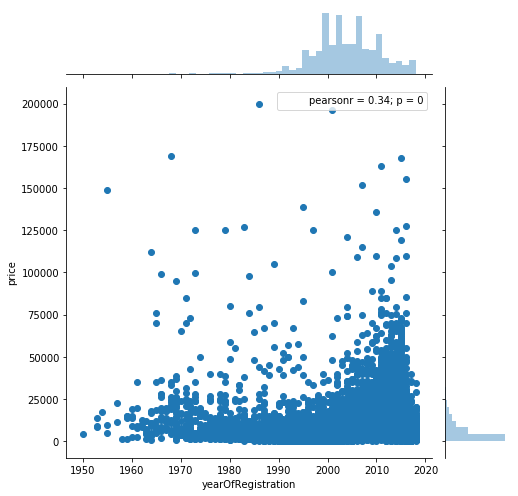

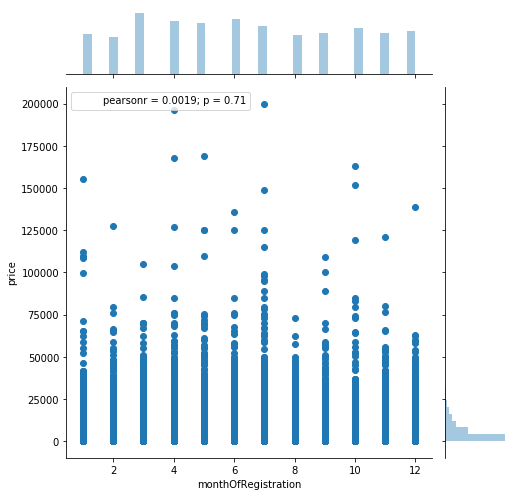

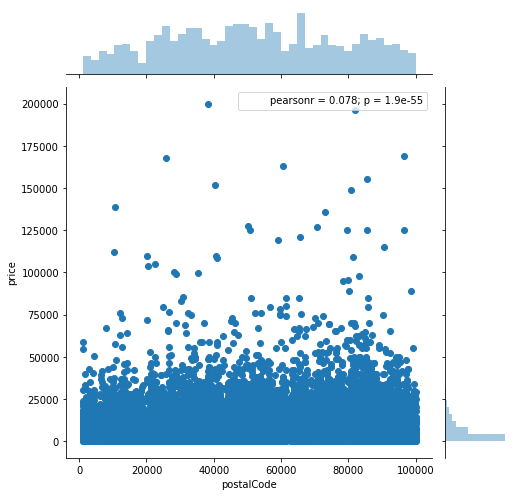

In [10]:
for i in ['yearOfRegistration', 'monthOfRegistration','postalCode']:
    sns.jointplot(x=i, y='price',data=df[[i,'price']],size=7)
    #df['price'].corr(df[i])

In [11]:
df.drop(['monthOfRegistration'],axis='columns',inplace=True)

### Feature Engineering - creating a new feature "ageOfCar" 

In [12]:
df['ageOfCar']=pd.DatetimeIndex(df['dateCreated']).year-df['yearOfRegistration']

C:\Users\Sri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


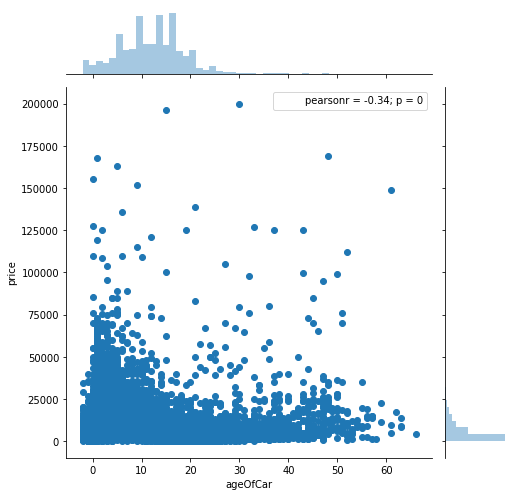

In [13]:
sns.jointplot(x='ageOfCar', y='price',data=df[['ageOfCar','price']],size=7)

In [14]:
df.drop(['yearOfRegistration','dateCreated'],axis='columns',inplace=True)

### Identifying outliers with boxplots

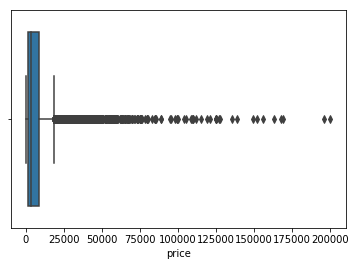

In [15]:
sns.boxplot(x=df['price'])

In [16]:
df[df.price>25000].count()

price                1292
abtest               1292
vehicleType          1292
gearbox              1292
powerPS              1292
model                1292
kilometer            1292
fuelType             1292
brand                1292
notRepairedDamage    1292
postalCode           1292
ageOfCar             1292
dtype: int64

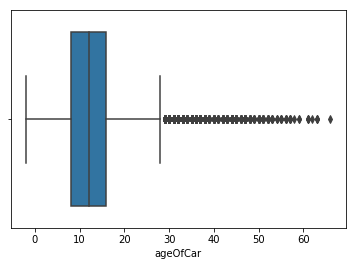

In [17]:
sns.boxplot(x=df['ageOfCar'])

In [18]:
df[(df.ageOfCar>30) | (df.ageOfCar<0)].count()

price                1656
abtest               1656
vehicleType          1656
gearbox              1656
powerPS              1656
model                1656
kilometer            1656
fuelType             1656
brand                1656
notRepairedDamage    1656
postalCode           1656
ageOfCar             1656
dtype: int64

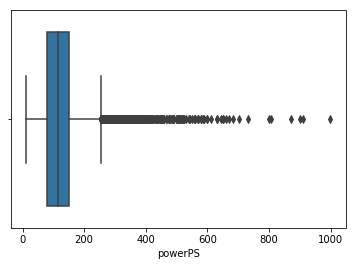

In [19]:
sns.boxplot(x=df['powerPS'])

In [20]:
df[df.powerPS>280].count()

price                1063
abtest               1063
vehicleType          1063
gearbox              1063
powerPS              1063
model                1063
kilometer            1063
fuelType             1063
brand                1063
notRepairedDamage    1063
postalCode           1063
ageOfCar             1063
dtype: int64

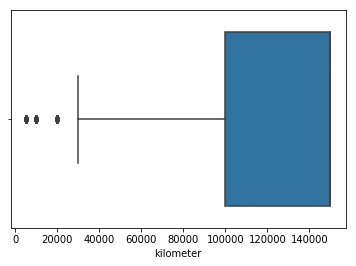

In [21]:
sns.boxplot(x=df['kilometer'])

In [22]:
df[df.kilometer<25000].count()

price                1277
abtest               1277
vehicleType          1277
gearbox              1277
powerPS              1277
model                1277
kilometer            1277
fuelType             1277
brand                1277
notRepairedDamage    1277
postalCode           1277
ageOfCar             1277
dtype: int64

In [23]:
df=df[(df.price<=25000) & (df.ageOfCar>=0) & (df.ageOfCar<=30) & (df.powerPS<=280) & (df.kilometer>=25000)]

In [24]:
df.describe()

,price,powerPS,kilometer,postalCode,ageOfCar
count,36244.000000,36244.000000,36244.000000,36244.000000,36244.000000
mean,5186.503145,120.283385,129749.199868,51519.525163,12.594664
std,5084.156881,48.451882,33502.785178,25766.465713,5.580795
min,100.000000,11.000000,30000.000000,1067.000000,0.000000
25%,1450.000000,80.000000,125000.000000,31167.000000,9.000000
50%,3300.000000,115.000000,150000.000000,50735.000000,13.000000
75%,7300.000000,150.000000,150000.000000,72294.750000,17.000000
max,25000.000000,280.000000,150000.000000,99998.000000,30.000000


### Encoding categorical variables

In [25]:
x=df.drop(['price'],axis='columns',inplace=False)
y=df['price']

#### Using Target Encoding for variables with more than 2 classes

In [26]:
from category_encoders import TargetEncoder

te=TargetEncoder(cols=['brand','model','vehicleType','fuelType','postalCode']).fit(x,y)
x=te.transform(x)

#### Using Label Encoding for variables with 2 classes

In [27]:
le1=LabelEncoder().fit(x['gearbox'])
x['gearbox'] =le1.transform(x['gearbox'])
le2=LabelEncoder().fit(x['notRepairedDamage'])
x['notRepairedDamage'] =le2.transform(x['notRepairedDamage'])
le3=LabelEncoder().fit(x['abtest'])
x['abtest']=le3.transform(x['abtest'])

### Developing a correlation heat map

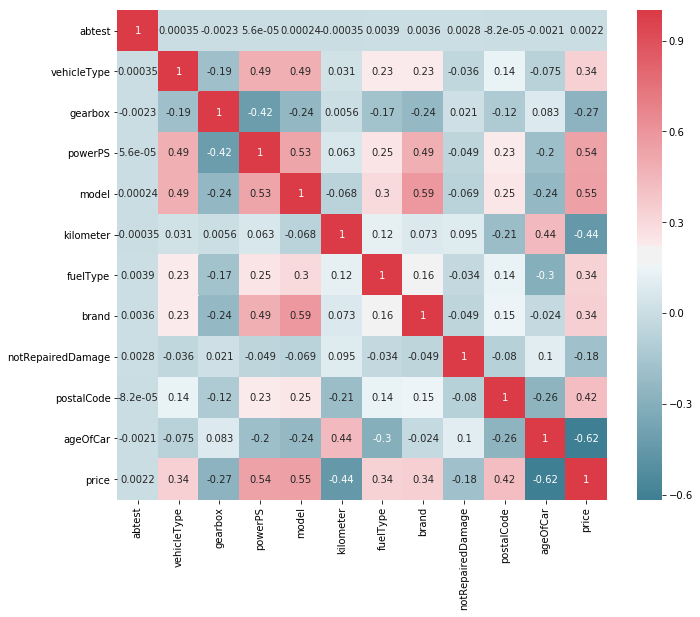

In [28]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
x['price']=y
sns.heatmap(x.corr(),cmap=cmap,square=True,annot=True)

In [29]:
x.corr().loc[:,'price'].abs().sort_values(ascending=False)

price                1.000000
ageOfCar             0.616141
model                0.548665
powerPS              0.541515
kilometer            0.444009
postalCode           0.424608
brand                0.343888
vehicleType          0.341504
fuelType             0.335169
gearbox              0.274499
notRepairedDamage    0.182082
abtest               0.002220
Name: price, dtype: float64

#### Removing poorly correlated "abtest" feature

In [30]:
x.drop(['abtest'],axis='columns',inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36244 entries, 0 to 49999
Data columns (total 11 columns):
vehicleType          36244 non-null float64
gearbox              36244 non-null int32
powerPS              36244 non-null int64
model                36244 non-null float64
kilometer            36244 non-null int64
fuelType             36244 non-null float64
brand                36244 non-null float64
notRepairedDamage    36244 non-null int32
postalCode           36244 non-null float64
ageOfCar             36244 non-null int64
price                36244 non-null int64
dtypes: float64(5), int32(2), int64(4)
memory usage: 3.0 MB


In [31]:
y=x['price']
x.drop(['price'],axis='columns',inplace=True)
feat=x.columns

### Standardization, spliting into training and validation set

In [32]:
sc=StandardScaler()
x=sc.fit_transform(x)

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(28995, 10) (7249, 10) (28995,) (7249,)


### Train and Test using XGBoost model

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param={'n_estimators':[10,20,50,100,150,200],
      'max_depth':range(3,11),
      'eta':[0.05,0.1,0.15,0.2,0.25,0.3]}

xgr=xgb.XGBRegressor()
gs=GridSearchCV(estimator=xgr,param_grid=param,scoring='neg_root_mean_squared_error',cv=5,verbose=3)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] eta=0.05, max_depth=3, n_estimators=10 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  eta=0.05, max_depth=3, n_estimators=10, score=-3460.055, total=   0.3s
[CV] eta=0.05, max_depth=3, n_estimators=10 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  eta=0.05, max_depth=3, n_estimators=10, score=-3690.503, total=   0.3s
[CV] eta=0.05, max_depth=3, n_estimators=10 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  eta=0.05, max_depth=3, n_estimators=10, score=-3600.828, total=   0.3s
[CV] eta=0.05, max_depth=3, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=10, score=-3643.683, total=   0.3s
[CV] eta=0.05, max_depth=3, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=10, score=-3551.902, total=   0.4s
[CV] eta=0.05, max_depth=3, n_estimators=20 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=20, score=-2409.842, total=   0.6s
[CV] eta=0.05, max_depth=3, n_estimators=20 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=20, score=-2568.301, total=   0.6s
[CV] eta=0.05, max_depth=3, n_estimators=20 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=20, score=-2519.121, total=   0.6s
[CV] eta=0.05, max_depth=3, n_estimators=20 ..........................
[CV]  eta=0.05, max_depth=3, n_estimators=20, score=-2546.281, total=   0.6s
[CV] eta=0.05, max_depth=3, n_estim

[CV]  eta=0.05, max_depth=4, n_estimators=200, score=-1714.171, total=   4.3s
[CV] eta=0.05, max_depth=4, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=4, n_estimators=200, score=-1759.029, total=   4.5s
[CV] eta=0.05, max_depth=5, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=5, n_estimators=10, score=-3181.468, total=   0.3s
[CV] eta=0.05, max_depth=5, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=5, n_estimators=10, score=-3412.763, total=   0.3s
[CV] eta=0.05, max_depth=5, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=5, n_estimators=10, score=-3297.076, total=   0.3s
[CV] eta=0.05, max_depth=5, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=5, n_estimators=10, score=-3349.663, total=   0.3s
[CV] eta=0.05, max_depth=5, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=5, n_estimators=10, score=-3258.105, total=   0.3s
[CV] eta=0.05, max_depth=5, n_est

[CV]  eta=0.05, max_depth=6, n_estimators=150, score=-1704.298, total=   4.7s
[CV] eta=0.05, max_depth=6, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=6, n_estimators=200, score=-1640.351, total=   6.2s
[CV] eta=0.05, max_depth=6, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=6, n_estimators=200, score=-1710.184, total=   6.6s
[CV] eta=0.05, max_depth=6, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=6, n_estimators=200, score=-1698.180, total=   6.9s
[CV] eta=0.05, max_depth=6, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=6, n_estimators=200, score=-1659.174, total=   6.8s
[CV] eta=0.05, max_depth=6, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=6, n_estimators=200, score=-1695.243, total=   7.1s
[CV] eta=0.05, max_depth=7, n_estimators=10 ..........................
[CV]  eta=0.05, max_depth=7, n_estimators=10, score=-3074.703, total=   0.5s
[CV] eta=0.05, max_depth=7, n

[CV]  eta=0.05, max_depth=8, n_estimators=150, score=-1613.671, total=   9.6s
[CV] eta=0.05, max_depth=8, n_estimators=150 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=150, score=-1717.529, total=   6.8s
[CV] eta=0.05, max_depth=8, n_estimators=150 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=150, score=-1726.200, total=   7.2s
[CV] eta=0.05, max_depth=8, n_estimators=150 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=150, score=-1654.726, total=   7.0s
[CV] eta=0.05, max_depth=8, n_estimators=150 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=150, score=-1697.477, total=   7.3s
[CV] eta=0.05, max_depth=8, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=200, score=-1617.718, total=   9.5s
[CV] eta=0.05, max_depth=8, n_estimators=200 .........................
[CV]  eta=0.05, max_depth=8, n_estimators=200, score=-1714.678, total=   9.3s
[CV] eta=0.05, max_depth=8, 

[CV]  eta=0.05, max_depth=10, n_estimators=100, score=-1735.574, total=   6.3s
[CV] eta=0.05, max_depth=10, n_estimators=100 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=100, score=-1770.933, total=   6.4s
[CV] eta=0.05, max_depth=10, n_estimators=100 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=100, score=-1683.362, total=   6.0s
[CV] eta=0.05, max_depth=10, n_estimators=100 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=100, score=-1734.462, total=   5.8s
[CV] eta=0.05, max_depth=10, n_estimators=150 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=150, score=-1664.232, total=  10.0s
[CV] eta=0.05, max_depth=10, n_estimators=150 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=150, score=-1731.916, total=   8.8s
[CV] eta=0.05, max_depth=10, n_estimators=150 ........................
[CV]  eta=0.05, max_depth=10, n_estimators=150, score=-1769.691, total=   8.8s
[CV] eta=0.05, max_de

[CV]  eta=0.1, max_depth=4, n_estimators=50, score=-1917.548, total=   1.4s
[CV] eta=0.1, max_depth=4, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=4, n_estimators=50, score=-1872.258, total=   1.6s
[CV] eta=0.1, max_depth=4, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=4, n_estimators=50, score=-1906.037, total=   1.6s
[CV] eta=0.1, max_depth=4, n_estimators=100 ..........................
[CV]  eta=0.1, max_depth=4, n_estimators=100, score=-1726.362, total=   3.0s
[CV] eta=0.1, max_depth=4, n_estimators=100 ..........................
[CV]  eta=0.1, max_depth=4, n_estimators=100, score=-1813.303, total=   2.5s
[CV] eta=0.1, max_depth=4, n_estimators=100 ..........................
[CV]  eta=0.1, max_depth=4, n_estimators=100, score=-1804.243, total=   2.8s
[CV] eta=0.1, max_depth=4, n_estimators=100 ..........................
[CV]  eta=0.1, max_depth=4, n_estimators=100, score=-1771.010, total=   2.7s
[CV] eta=0.1, max_depth=4, n_estimator

[CV]  eta=0.1, max_depth=6, n_estimators=20, score=-2174.761, total=   1.4s
[CV] eta=0.1, max_depth=6, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=20, score=-2129.356, total=   1.5s
[CV] eta=0.1, max_depth=6, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=50, score=-1713.684, total=   2.9s
[CV] eta=0.1, max_depth=6, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=50, score=-1795.859, total=   2.6s
[CV] eta=0.1, max_depth=6, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=50, score=-1767.103, total=   3.9s
[CV] eta=0.1, max_depth=6, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=50, score=-1750.667, total=   2.7s
[CV] eta=0.1, max_depth=6, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=6, n_estimators=50, score=-1782.630, total=   2.2s
[CV] eta=0.1, max_depth=6, n_estimators=10

[CV]  eta=0.1, max_depth=8, n_estimators=10, score=-3122.036, total=   0.6s
[CV] eta=0.1, max_depth=8, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=20, score=-1951.828, total=   1.1s
[CV] eta=0.1, max_depth=8, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=20, score=-2129.392, total=   1.1s
[CV] eta=0.1, max_depth=8, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=20, score=-2069.545, total=   1.1s
[CV] eta=0.1, max_depth=8, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=20, score=-2068.294, total=   1.1s
[CV] eta=0.1, max_depth=8, n_estimators=20 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=20, score=-2050.570, total=   1.1s
[CV] eta=0.1, max_depth=8, n_estimators=50 ...........................
[CV]  eta=0.1, max_depth=8, n_estimators=50, score=-1652.924, total=   2.6s
[CV] eta=0.1, max_depth=8, n_estimators=50

[CV]  eta=0.1, max_depth=10, n_estimators=10, score=-3022.533, total=   0.7s
[CV] eta=0.1, max_depth=10, n_estimators=10 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=10, score=-3277.494, total=   0.7s
[CV] eta=0.1, max_depth=10, n_estimators=10 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=10, score=-3158.791, total=   0.7s
[CV] eta=0.1, max_depth=10, n_estimators=10 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=10, score=-3195.656, total=   0.7s
[CV] eta=0.1, max_depth=10, n_estimators=10 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=10, score=-3109.389, total=   0.7s
[CV] eta=0.1, max_depth=10, n_estimators=20 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=20, score=-1934.345, total=   1.5s
[CV] eta=0.1, max_depth=10, n_estimators=20 ..........................
[CV]  eta=0.1, max_depth=10, n_estimators=20, score=-2099.961, total=   1.4s
[CV] eta=0.1, max_depth=10, n_estim

[CV]  eta=0.15, max_depth=3, n_estimators=200, score=-1797.102, total=   4.1s
[CV] eta=0.15, max_depth=3, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=3, n_estimators=200, score=-1801.905, total=   4.1s
[CV] eta=0.15, max_depth=3, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=3, n_estimators=200, score=-1755.369, total=   4.3s
[CV] eta=0.15, max_depth=3, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=3, n_estimators=200, score=-1816.780, total=   4.2s
[CV] eta=0.15, max_depth=4, n_estimators=10 ..........................
[CV]  eta=0.15, max_depth=4, n_estimators=10, score=-3277.001, total=   0.3s
[CV] eta=0.15, max_depth=4, n_estimators=10 ..........................
[CV]  eta=0.15, max_depth=4, n_estimators=10, score=-3518.093, total=   0.3s
[CV] eta=0.15, max_depth=4, n_estimators=10 ..........................
[CV]  eta=0.15, max_depth=4, n_estimators=10, score=-3414.156, total=   0.3s
[CV] eta=0.15, max_depth=4, n_e

[CV]  eta=0.15, max_depth=5, n_estimators=150, score=-1741.402, total=   4.7s
[CV] eta=0.15, max_depth=5, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=150, score=-1703.553, total=   4.8s
[CV] eta=0.15, max_depth=5, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=150, score=-1736.653, total=   4.7s
[CV] eta=0.15, max_depth=5, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=200, score=-1656.580, total=   6.1s
[CV] eta=0.15, max_depth=5, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=200, score=-1731.721, total=   6.3s
[CV] eta=0.15, max_depth=5, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=200, score=-1727.290, total=   6.1s
[CV] eta=0.15, max_depth=5, n_estimators=200 .........................
[CV]  eta=0.15, max_depth=5, n_estimators=200, score=-1687.048, total=   6.1s
[CV] eta=0.15, max_depth=5, 

[CV]  eta=0.15, max_depth=7, n_estimators=100, score=-1663.854, total=   4.3s
[CV] eta=0.15, max_depth=7, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=100, score=-1696.453, total=   4.8s
[CV] eta=0.15, max_depth=7, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=150, score=-1627.158, total=   6.4s
[CV] eta=0.15, max_depth=7, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=150, score=-1707.093, total=   6.4s
[CV] eta=0.15, max_depth=7, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=150, score=-1697.970, total=   6.4s
[CV] eta=0.15, max_depth=7, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=150, score=-1646.791, total=   6.4s
[CV] eta=0.15, max_depth=7, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=7, n_estimators=150, score=-1682.082, total=   6.8s
[CV] eta=0.15, max_depth=7, 

[CV]  eta=0.15, max_depth=9, n_estimators=50, score=-1732.255, total=   3.1s
[CV] eta=0.15, max_depth=9, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=100, score=-1650.719, total=   5.7s
[CV] eta=0.15, max_depth=9, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=100, score=-1721.310, total=   5.7s
[CV] eta=0.15, max_depth=9, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=100, score=-1736.618, total=   6.0s
[CV] eta=0.15, max_depth=9, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=100, score=-1660.196, total=   5.8s
[CV] eta=0.15, max_depth=9, n_estimators=100 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=100, score=-1709.666, total=   5.9s
[CV] eta=0.15, max_depth=9, n_estimators=150 .........................
[CV]  eta=0.15, max_depth=9, n_estimators=150, score=-1651.720, total=   9.6s
[CV] eta=0.15, max_depth=9, n

[CV]  eta=0.2, max_depth=3, n_estimators=50, score=-1908.037, total=   1.1s
[CV] eta=0.2, max_depth=3, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=3, n_estimators=50, score=-2010.782, total=   1.1s
[CV] eta=0.2, max_depth=3, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=3, n_estimators=50, score=-1989.779, total=   1.2s
[CV] eta=0.2, max_depth=3, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=3, n_estimators=50, score=-1974.315, total=   1.1s
[CV] eta=0.2, max_depth=3, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=3, n_estimators=50, score=-2003.204, total=   1.1s
[CV] eta=0.2, max_depth=3, n_estimators=100 ..........................
[CV]  eta=0.2, max_depth=3, n_estimators=100, score=-1806.100, total=   2.1s
[CV] eta=0.2, max_depth=3, n_estimators=100 ..........................
[CV]  eta=0.2, max_depth=3, n_estimators=100, score=-1877.950, total=   2.2s
[CV] eta=0.2, max_depth=3, n_estimators=

[CV]  eta=0.2, max_depth=5, n_estimators=20, score=-2275.443, total=   0.7s
[CV] eta=0.2, max_depth=5, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=20, score=-2217.600, total=   0.7s
[CV] eta=0.2, max_depth=5, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=20, score=-2241.796, total=   0.8s
[CV] eta=0.2, max_depth=5, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=20, score=-2203.577, total=   0.7s
[CV] eta=0.2, max_depth=5, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=50, score=-1759.302, total=   1.7s
[CV] eta=0.2, max_depth=5, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=50, score=-1849.041, total=   1.7s
[CV] eta=0.2, max_depth=5, n_estimators=50 ...........................
[CV]  eta=0.2, max_depth=5, n_estimators=50, score=-1832.657, total=   1.6s
[CV] eta=0.2, max_depth=5, n_estimators=50

[CV]  eta=0.2, max_depth=7, n_estimators=10, score=-3181.630, total=   0.5s
[CV] eta=0.2, max_depth=7, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=10, score=-3244.262, total=   0.5s
[CV] eta=0.2, max_depth=7, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=10, score=-3140.927, total=   0.5s
[CV] eta=0.2, max_depth=7, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=20, score=-1991.103, total=   0.9s
[CV] eta=0.2, max_depth=7, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=20, score=-2154.087, total=   1.0s
[CV] eta=0.2, max_depth=7, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=20, score=-2091.172, total=   0.9s
[CV] eta=0.2, max_depth=7, n_estimators=20 ...........................
[CV]  eta=0.2, max_depth=7, n_estimators=20, score=-2118.471, total=   0.9s
[CV] eta=0.2, max_depth=7, n_estimators=20

[CV]  eta=0.2, max_depth=8, n_estimators=200, score=-1652.932, total=   9.9s
[CV] eta=0.2, max_depth=8, n_estimators=200 ..........................
[CV]  eta=0.2, max_depth=8, n_estimators=200, score=-1696.477, total=   9.6s
[CV] eta=0.2, max_depth=9, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=9, n_estimators=10, score=-3027.879, total=   0.6s
[CV] eta=0.2, max_depth=9, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=9, n_estimators=10, score=-3269.492, total=   0.7s
[CV] eta=0.2, max_depth=9, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=9, n_estimators=10, score=-3156.659, total=   0.7s
[CV] eta=0.2, max_depth=9, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=9, n_estimators=10, score=-3195.725, total=   0.6s
[CV] eta=0.2, max_depth=9, n_estimators=10 ...........................
[CV]  eta=0.2, max_depth=9, n_estimators=10, score=-3104.998, total=   0.6s
[CV] eta=0.2, max_depth=9, n_estimators=

[CV]  eta=0.2, max_depth=10, n_estimators=150, score=-1735.147, total=   9.5s
[CV] eta=0.2, max_depth=10, n_estimators=200 .........................
[CV]  eta=0.2, max_depth=10, n_estimators=200, score=-1669.277, total=  12.3s
[CV] eta=0.2, max_depth=10, n_estimators=200 .........................
[CV]  eta=0.2, max_depth=10, n_estimators=200, score=-1733.939, total=  12.2s
[CV] eta=0.2, max_depth=10, n_estimators=200 .........................
[CV]  eta=0.2, max_depth=10, n_estimators=200, score=-1773.891, total=  12.5s
[CV] eta=0.2, max_depth=10, n_estimators=200 .........................
[CV]  eta=0.2, max_depth=10, n_estimators=200, score=-1687.714, total=  12.3s
[CV] eta=0.2, max_depth=10, n_estimators=200 .........................
[CV]  eta=0.2, max_depth=10, n_estimators=200, score=-1740.015, total=  12.4s
[CV] eta=0.25, max_depth=3, n_estimators=10 ..........................
[CV]  eta=0.25, max_depth=3, n_estimators=10, score=-3460.055, total=   0.3s
[CV] eta=0.25, max_depth=3, n

[CV]  eta=0.25, max_depth=4, n_estimators=150, score=-1701.642, total=   3.8s
[CV] eta=0.25, max_depth=4, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=150, score=-1785.086, total=   3.9s
[CV] eta=0.25, max_depth=4, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=150, score=-1775.152, total=   4.1s
[CV] eta=0.25, max_depth=4, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=150, score=-1736.272, total=   3.8s
[CV] eta=0.25, max_depth=4, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=150, score=-1777.717, total=   3.8s
[CV] eta=0.25, max_depth=4, n_estimators=200 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=200, score=-1684.779, total=   5.0s
[CV] eta=0.25, max_depth=4, n_estimators=200 .........................
[CV]  eta=0.25, max_depth=4, n_estimators=200, score=-1766.285, total=   5.1s
[CV] eta=0.25, max_depth=4, 

[CV]  eta=0.25, max_depth=6, n_estimators=100, score=-1736.073, total=   3.8s
[CV] eta=0.25, max_depth=6, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=100, score=-1716.440, total=   3.7s
[CV] eta=0.25, max_depth=6, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=100, score=-1692.522, total=   3.6s
[CV] eta=0.25, max_depth=6, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=100, score=-1724.793, total=   3.8s
[CV] eta=0.25, max_depth=6, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=150, score=-1644.371, total=   5.5s
[CV] eta=0.25, max_depth=6, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=150, score=-1719.303, total=   5.4s
[CV] eta=0.25, max_depth=6, n_estimators=150 .........................
[CV]  eta=0.25, max_depth=6, n_estimators=150, score=-1704.924, total=   5.5s
[CV] eta=0.25, max_depth=6, 

[CV]  eta=0.25, max_depth=8, n_estimators=50, score=-1755.606, total=   2.7s
[CV] eta=0.25, max_depth=8, n_estimators=50 ..........................
[CV]  eta=0.25, max_depth=8, n_estimators=50, score=-1692.709, total=   2.7s
[CV] eta=0.25, max_depth=8, n_estimators=50 ..........................
[CV]  eta=0.25, max_depth=8, n_estimators=50, score=-1733.762, total=   2.7s
[CV] eta=0.25, max_depth=8, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=8, n_estimators=100, score=-1621.295, total=   4.9s
[CV] eta=0.25, max_depth=8, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=8, n_estimators=100, score=-1726.952, total=   5.0s
[CV] eta=0.25, max_depth=8, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=8, n_estimators=100, score=-1731.967, total=   4.9s
[CV] eta=0.25, max_depth=8, n_estimators=100 .........................
[CV]  eta=0.25, max_depth=8, n_estimators=100, score=-1661.538, total=   5.1s
[CV] eta=0.25, max_depth=8, n_e

[CV]  eta=0.25, max_depth=10, n_estimators=20, score=-2038.545, total=   1.4s
[CV] eta=0.25, max_depth=10, n_estimators=20 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=20, score=-2026.139, total=   1.5s
[CV] eta=0.25, max_depth=10, n_estimators=50 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=50, score=-1670.144, total=   3.3s
[CV] eta=0.25, max_depth=10, n_estimators=50 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=50, score=-1749.899, total=   3.4s
[CV] eta=0.25, max_depth=10, n_estimators=50 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=50, score=-1783.731, total=   4.4s
[CV] eta=0.25, max_depth=10, n_estimators=50 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=50, score=-1694.578, total=   4.4s
[CV] eta=0.25, max_depth=10, n_estimators=50 .........................
[CV]  eta=0.25, max_depth=10, n_estimators=50, score=-1743.057, total=   4.6s
[CV] eta=0.25, max_depth=10,

[CV]  eta=0.3, max_depth=4, n_estimators=10, score=-3364.033, total=   0.3s
[CV] eta=0.3, max_depth=4, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=20, score=-2219.090, total=   0.5s
[CV] eta=0.3, max_depth=4, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=20, score=-2389.842, total=   0.5s
[CV] eta=0.3, max_depth=4, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=20, score=-2334.064, total=   0.5s
[CV] eta=0.3, max_depth=4, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=20, score=-2362.850, total=   0.5s
[CV] eta=0.3, max_depth=4, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=20, score=-2318.512, total=   0.6s
[CV] eta=0.3, max_depth=4, n_estimators=50 ...........................
[CV]  eta=0.3, max_depth=4, n_estimators=50, score=-1809.254, total=   1.4s
[CV] eta=0.3, max_depth=4, n_estimators=50

[CV]  eta=0.3, max_depth=6, n_estimators=10, score=-3119.061, total=   0.5s
[CV] eta=0.3, max_depth=6, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=10, score=-3340.325, total=   0.4s
[CV] eta=0.3, max_depth=6, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=10, score=-3217.929, total=   0.4s
[CV] eta=0.3, max_depth=6, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=10, score=-3286.674, total=   0.4s
[CV] eta=0.3, max_depth=6, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=10, score=-3183.060, total=   0.5s
[CV] eta=0.3, max_depth=6, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=20, score=-2047.185, total=   0.8s
[CV] eta=0.3, max_depth=6, n_estimators=20 ...........................
[CV]  eta=0.3, max_depth=6, n_estimators=20, score=-2190.301, total=   0.8s
[CV] eta=0.3, max_depth=6, n_estimators=20

[CV]  eta=0.3, max_depth=7, n_estimators=200, score=-1698.761, total=   8.2s
[CV] eta=0.3, max_depth=7, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=7, n_estimators=200, score=-1691.769, total=   8.2s
[CV] eta=0.3, max_depth=7, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=7, n_estimators=200, score=-1640.128, total=   8.2s
[CV] eta=0.3, max_depth=7, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=7, n_estimators=200, score=-1677.641, total=   8.1s
[CV] eta=0.3, max_depth=8, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=8, n_estimators=10, score=-3042.633, total=   0.6s
[CV] eta=0.3, max_depth=8, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=8, n_estimators=10, score=-3289.590, total=   0.6s
[CV] eta=0.3, max_depth=8, n_estimators=10 ...........................
[CV]  eta=0.3, max_depth=8, n_estimators=10, score=-3158.927, total=   0.6s
[CV] eta=0.3, max_depth=8, n_estimator

[CV]  eta=0.3, max_depth=9, n_estimators=150, score=-1732.191, total=   8.4s
[CV] eta=0.3, max_depth=9, n_estimators=150 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=150, score=-1658.172, total=   8.5s
[CV] eta=0.3, max_depth=9, n_estimators=150 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=150, score=-1711.835, total=   8.5s
[CV] eta=0.3, max_depth=9, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=200, score=-1656.038, total=  10.7s
[CV] eta=0.3, max_depth=9, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=200, score=-1719.476, total=  10.8s
[CV] eta=0.3, max_depth=9, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=200, score=-1734.450, total=  11.0s
[CV] eta=0.3, max_depth=9, n_estimators=200 ..........................
[CV]  eta=0.3, max_depth=9, n_estimators=200, score=-1660.234, total=  10.9s
[CV] eta=0.3, max_depth=9, n_estima

[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed: 86.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': range(3, 11),
                         'n_estimators': [10, 20, 50, 100, 150, 200]},
             pre_dispatch='2*n_jobs

In [34]:
print(gs.best_params_)
print(gs.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, eta=0.05, gamma=0, learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=True, subsample=1)
{'eta': 0.05, 'max_depth': 7, 'n_estimators': 200}
-1666.210209182424


In [35]:
#eta:0.05 max_depth: 7 n_estimators: 200
from sklearn.metrics import mean_squared_error

xgr=xgb.XGBRegressor(eta=0.05,max_depth=7,n_estimators=200)
xgr.fit(X_train,y_train)
pred=xgr.predict(X_val)
print('RMSE: ',mean_squared_error(y_val,pred,squared=False))
print('R2Score: ',xgr.score(X_val,y_val))

RMSE:  1629.4788838437842
R2Score:  0.9006464910649898


### Visualizing Residuals

C:\Users\Sri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Sri\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


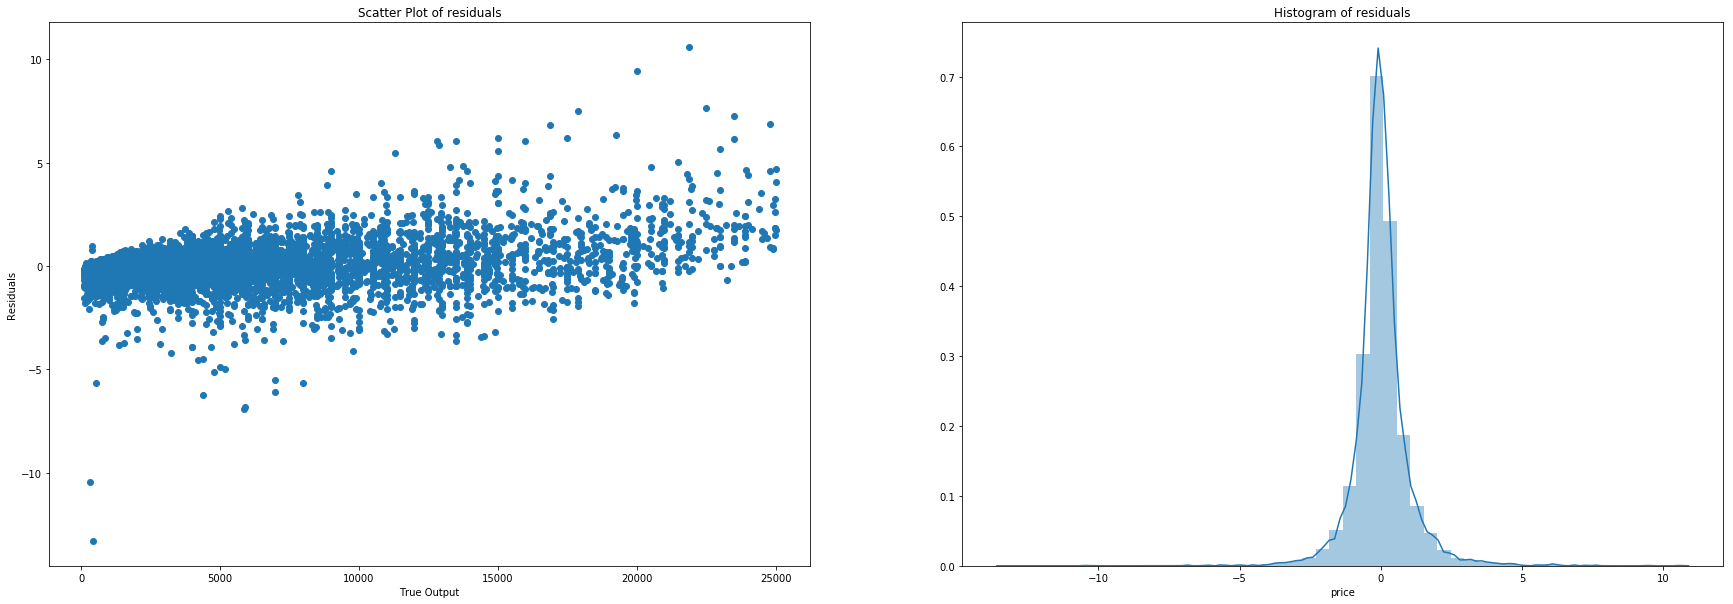

In [36]:
def residual_plot(y_test, y_pred):
    
    res =  y_test - y_pred
    fig, axs = plt.subplots(1,2,figsize=(30,10))
    std_res = res/np.std(res)
    axs[0].title.set_text('Scatter Plot of residuals')
    axs[0].set_xlabel('True Output')
    axs[0].set_ylabel('Residuals')
    axs[0].scatter(y_test,std_res)
    axs[1].title.set_text('Histogram of residuals')
    sns.distplot(std_res, ax = axs[1]);
    plt.show()

residual_plot(y_val,pred)

### Plot feature importance

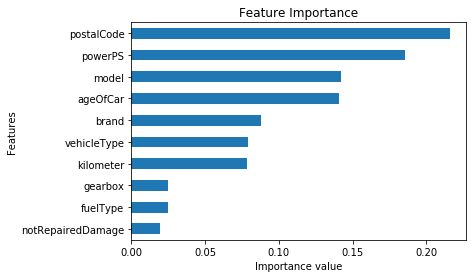

In [37]:
feature_important = xgr.feature_importances_
values = list(feature_important)

data = pd.DataFrame(data=values, index=feat, columns=["score"]).sort_values(by = "score")
ax=data.plot(kind='barh',title='Feature Importance',legend=None)
ax.set_xlabel('Importance value')
ax.set_ylabel('Features')
plt.show()

#xgb.plot_importance(xgr)
#plt.rcParams['figure.figsize'] = [7, 7]
#plt.show()
#print(feat)